In [1]:
# Dados
import pandas as pd
import numpy as np
import random as rnd
import statistics

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier



'\nimport pandas as pd\nimport numpy as np\nimport statistics\nimport matplotlib.pyplot as plt\n'

In [2]:
df = pd.read_csv('tested.csv')

In [3]:
#Analisando as colunas do dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
"""
DESCRIÇÃO DAS COLUNAS DO DATASET
PassengerId: Unique identifier for each passenger
Survived: Whether the passenger survived (0 = No, 1 = Yes)
Pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
Name: Passenger's name
Sex: Passenger's gender (male or female)
Age: Passenger's age in years
SibSp: Number of siblings/spouses aboard the Titanic
Parch: Number of parents/children aboard the Titanic
Ticket: Ticket number
Fare: Fare paid for the ticket
Cabin: Cabin number
Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
"""

"\nDESCRIÇÃO DAS COLUNAS DO DATASET\nPassengerId: Unique identifier for each passenger\nSurvived: Whether the passenger survived (0 = No, 1 = Yes)\nPclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)\nName: Passenger's name\nSex: Passenger's gender (male or female)\nAge: Passenger's age in years\nSibSp: Number of siblings/spouses aboard the Titanic\nParch: Number of parents/children aboard the Titanic\nTicket: Ticket number\nFare: Fare paid for the ticket\nCabin: Cabin number\nEmbarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)\n"

In [5]:
#Saber quantas linhas e colunas tem o dataset
df.shape

(418, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
#Verificando quais colunas possuem valores nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
#Substituindo os valores de tickets nulos pela média de valor da classe
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [9]:
media_c3= df['Fare'][df['Pclass']==3].mean()
print(media_c3)

12.459677880184334


In [10]:
df['Fare'].fillna(value=media_c3,inplace=True)
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
df['Age'] = df['Age'].astype(float)

In [12]:
#Preenchendo as idades de acordo com a média por título do nome
media_age_miss = df[df['Name'].str.contains('Miss.',na=False)]['Age'].mean()
media_age_mrs = df[df["Name"].str.contains('Mrs.', na=False)]['Age'].mean()
media_age_mr = df[df["Name"].str.contains('Mr.', na=False)]['Age'].mean()
media_age_master = df[df["Name"].str.contains('Master.', na=False)]['Age'].mean()

In [13]:
def preenchimento_age(nome_idade):
    name = nome_idade[0]
    age = nome_idade[1]
    if pd.isnull(age):
        if 'Mr.' in name:
            return media_age_mr
        if 'Mrs.' in name:
            return media_age_mrs
        if 'Miss.' in name:
            return media_age_miss
        if 'Master.' in name:
            return media_age_master
        if 'Dr.' in name:
            return media_age_master
        if 'Ms.' in name:
            return media_age_miss
    else:
        return age
df['Age'] = df[['Name', 'Age']].apply(preenchimento_age,axis=1)

print(df['Age'])

0      34.500000
1      47.000000
2      62.000000
3      27.000000
4      22.000000
         ...    
413    33.746939
414    39.000000
415    38.500000
416    33.746939
417     7.406471
Name: Age, Length: 418, dtype: float64


In [14]:
#Conferindo se ainda existe alguma idade vazia
df['Age'].isnull().sum()

0

In [15]:
#Excluindo a coluna Cabin pois tem muitos vazios
df.drop(['Cabin'],axis=1, inplace=True)

In [16]:
#Verificando o tipo das colunas
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [17]:
df['Pclass'] = df['Pclass'].astype(object)
df['SibSp'] = df['SibSp'].astype(object)
df['Parch'] = df['Parch'].astype(object)
df['Embarked'] = df['Embarked'].astype(object)
df['Survived'] = df['Survived'].astype(object)

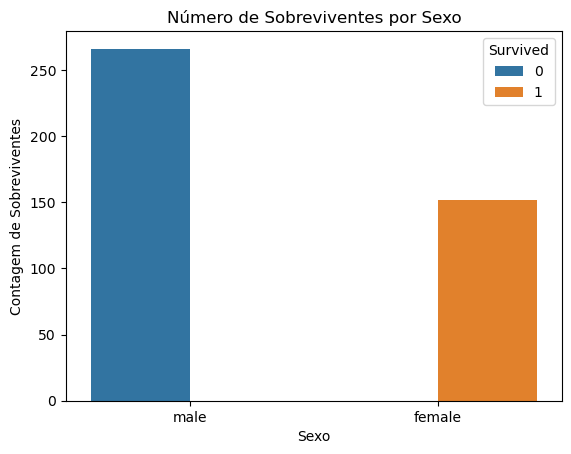

In [22]:
#Gráfico de sobreviventes por sexo
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Número de Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem de Sobreviventes')
plt.show()

In [21]:
#Separando as variáveis categóricas
df_cat= df[['Sex','Embarked','Pclass','SibSp','Parch','Survived']]
df_cat.head()

,Sex,Embarked,Pclass,SibSp,Parch,Survived
0,male,Q,3,0,0,0
1,female,S,3,1,0,1
2,male,Q,2,0,0,0
3,male,S,3,0,0,0
4,female,S,3,1,1,1


In [23]:
#Transformando categória em numérica
categories = {"female": 1, "male": 0}
df['Sex']= df['Sex'].map(categories)

new_df = pd.concat([df, pd.get_dummies(df['Embarked'],drop_first=True)], axis=1) 

new_df.drop(['Embarked'], axis=1, inplace=True)

In [25]:
new_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,1,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,1
5,897,0,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,0,1
6,898,1,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,1,0
7,899,0,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,0,1
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,0,0
9,901,0,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,0,1


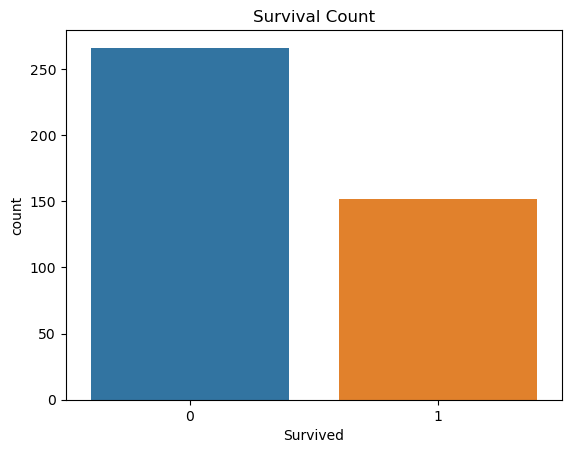

In [26]:
# Analisando a quantidade de sobreviventes total
sns.countplot(x='Survived', data=new_df)
plt.title('Survival Count')
plt.show()

In [27]:
#Descobrindo a média de preço dos tickets por classe
df.groupby('Pclass')['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [28]:
#Descobrindo a média de preço total dos tickets
df['Fare'].mean()

35.571763822679834

In [29]:
#Somando quantas mortes tiveram
df[df['Survived']==0]['PassengerId'].count()

266

In [30]:
#Analisando a quantidade de sobreviventes por classe

df[df['Survived']==0].groupby('Pclass')['PassengerId'].count()

Pclass
1     57
2     63
3    146
Name: PassengerId, dtype: int64

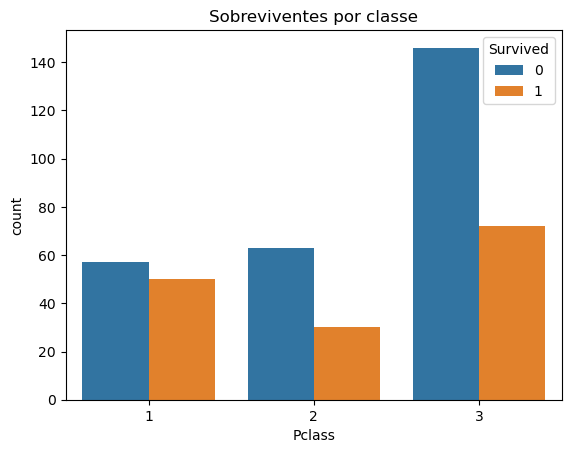

In [33]:
#Gráfico de sobreviventes por classe

sns.countplot(x='Pclass', data=new_df, hue='Survived')
plt.title('Sobreviventes por classe')
plt.show()

In [ ]:
# Analisando a quantidade de sobrevientes por sexo e classe
sobreviventes = df[df['Survived']==1]
sobreviventes.groupby(['Sex','Pclass'])['Survived'].sum()

In [35]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,1,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,1


In [37]:
new_df.dtypes

PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex              int64
Age            float64
SibSp           object
Parch           object
Ticket          object
Fare           float64
Q                uint8
S                uint8
dtype: object

In [38]:
#Ajustando os tipos da coluna para fazer correlação
new_df['Survived'] = new_df['Survived'].astype(int)
new_df['Pclass'] = new_df['Pclass'].astype(int)
new_df['SibSp'] = new_df['SibSp'].astype(int)
new_df['Parch'] = new_df['Parch'].astype(int)

In [39]:
# Analisando a correlação entre as colunas
corr = new_df.corr()
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
PassengerId,1.000000,-0.023245,-0.026751,-0.023245,-0.054528,0.003818,0.043080,0.008673,-0.035731,0.048008
Survived,-0.023245,1.000000,-0.108615,1.000000,-0.024765,0.099943,0.159120,0.192094,0.115574,-0.105883
Pclass,-0.026751,-0.108615,1.000000,-0.108615,-0.438878,0.001087,0.018721,-0.577368,0.252608,0.120783
Sex,-0.023245,1.000000,-0.108615,1.000000,-0.024765,0.099943,0.159120,0.192094,0.115574,-0.105883
Age,-0.054528,-0.024765,-0.438878,-0.024765,1.000000,-0.103678,-0.035388,0.310956,-0.051837,-0.112712
SibSp,0.003818,0.099943,0.001087,0.099943,-0.103678,1.000000,0.306895,0.171949,-0.098824,0.079367
Parch,0.043080,0.159120,0.018721,0.159120,-0.035388,0.306895,1.000000,0.230352,-0.132948,0.092201
Fare,0.008673,0.192094,-0.577368,0.192094,0.310956,0.171949,0.230352,1.000000,-0.155157,-0.179163
Q,-0.035731,0.115574,0.252608,0.115574,-0.051837,-0.098824,-0.132948,-0.155157,1.000000,-0.474962
S,0.048008,-0.105883,0.120783,-0.105883,-0.112712,0.079367,0.092201,-0.179163,-0.474962,1.000000


In [ ]:
#Acima conseguimos ver a forte relação positiva entre sexo e sobreviventes

<AxesSubplot:>

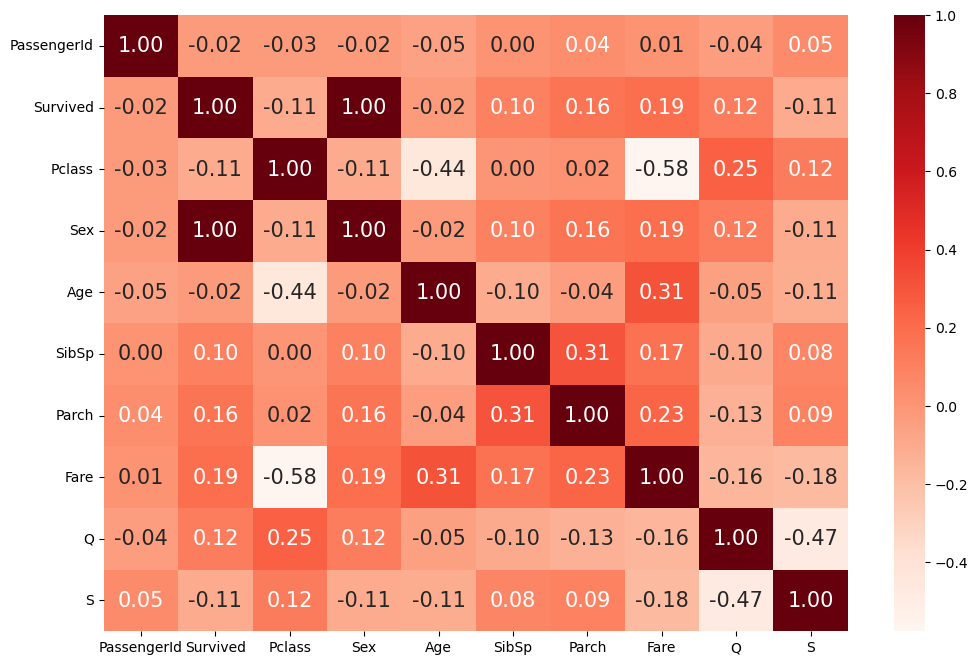

In [41]:
#Podemos ver melhor os dados de correlação por um mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Reds')

In [42]:
new_df.drop(['Sex'], axis=1, inplace=True)

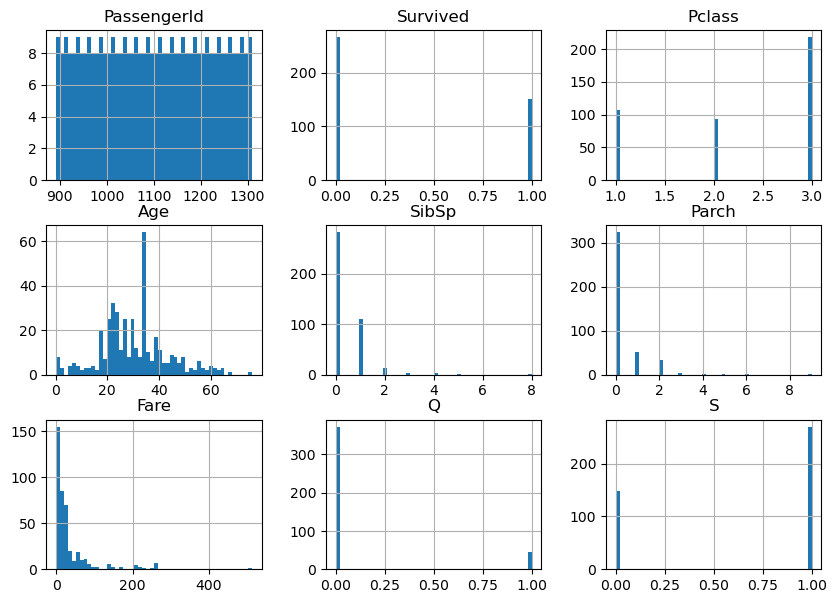

In [43]:
new_df.hist(bins=50, figsize=(10,7))
plt.show()

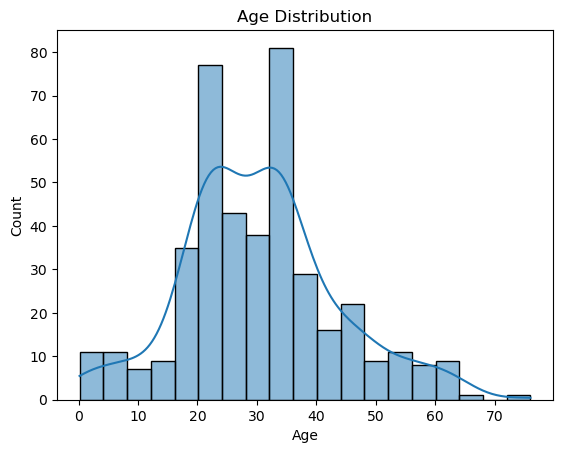

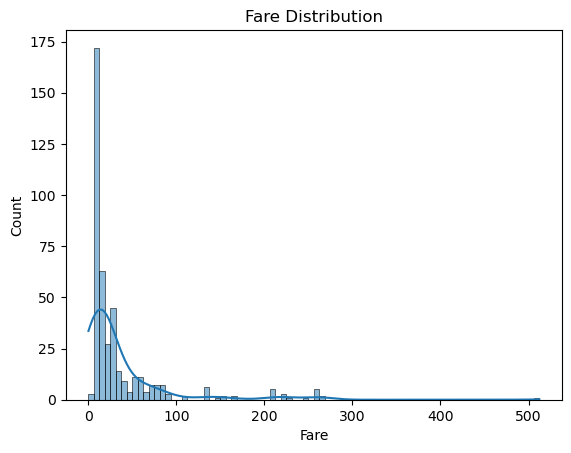

In [46]:
#Criando histograma com linha para Age e Fare para identificar outliers
sns.histplot(x='Age', data=new_df, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(x='Fare', data=new_df, kde=True)
plt.title('Fare Distribution')
plt.show()

In [48]:
#Remover outliers de Fare
# Calculate IQR
q1 = new_df['Fare'].quantile(0.25)
q3 = new_df['Fare'].quantile(0.75)
iqr = q3 - q1

# Define range
lower_range = q1 - 1.2 * iqr
upper_range = q3 + 1.2 * iqr

# Identify outliers
outlier_indices = new_df[(new_df['Fare'] < lower_range) | (new_df['Fare'] > upper_range)].index

# Remove outliers
cleaned_df = new_df.drop(outlier_indices)

In [49]:
## importing modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [70]:
#Excluindo colunas que não tem relação
cleaned_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [72]:
#Definindo os features e target do modelo

X = cleaned_df.drop(['Survived'], axis=1)
y = cleaned_df['Survived']

In [75]:
#Normalizando os dados

from sklearn.preprocessing import StandardScaler

X = cleaned_df.drop(['Survived'], axis=1)

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [77]:
#Dividindo dados para treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [79]:
#Verificando resultados para Regressão Logística

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Avaliando o desempenho do modelo no conjunto de treinamento
train_score = lr.score(X_train, y_train)
print('Training score: ', round(train_score, 3))

# Avaliando o desempenho do modelo no conjunto de teste
test_score = lr.score(X_test, y_test)
print('Testing score: ', round(test_score, 3))

Training score:  0.687
Testing score:  0.685


In [78]:
#Verificando resultados para Random Forest 

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2)
rf.fit(X_train, y_train)
print('Training score: ', round(rf.score(X_train, y_train),3))
print('Testing score: ', round(rf.score(X_test, y_test),3))

Training score:  0.849
Testing score:  0.742


In [80]:
#Verificando resultados para KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Training score: ', round(knn.score(X_train, y_train), 3))
print('Testing score: ', round(knn.score(X_test, y_test), 3))

Training score:  0.774
Testing score:  0.708


C:\Users\irene.oliveira\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\irene.oliveira\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [82]:
#Verificando resultados para SVM
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

print('Training score: ', round(svm.score(X_train, y_train), 3))
print('Testing score: ', round(svm.score(X_test, y_test), 3))

Training score:  0.792
Testing score:  0.742
